# Visualizing the Chernoff Bound

## Introduction
There is an extremely useful inequality that bounds how far a sum of independent Bernoulli random variables can stray away from its expectation. The Chernoff bound claims that if $X$ is a sum of independent Bernoulli random variables: 
$$P[X\geq(1+\epsilon)E(X)] \leq \exp(\frac{\epsilon^2\cdot E(X)}{3})$$

when $0 \leq \epsilon < 4$. When $\epsilon$ is large, or when $\epsilon > 4$, the general Chernoff bound is used:
$$P[X\geq(1+\epsilon)E(X)] \leq \exp(\frac{\epsilon \ln(\epsilon)\cdot E(X)}{2})$$

In this document we will experimentally visualize the Chernoff bounds.

## Part A
Here we see sums of Bernoulli trials with probability $\frac{1}{2}$. The runs will be for sums of 10, 100, and 1000 Bernoulli trials. We will take 10000 samples for all to plot our histogram. We will set $\epsilon$ to be 0.1. Furthermore, the number of values above the set bounds will be reported.

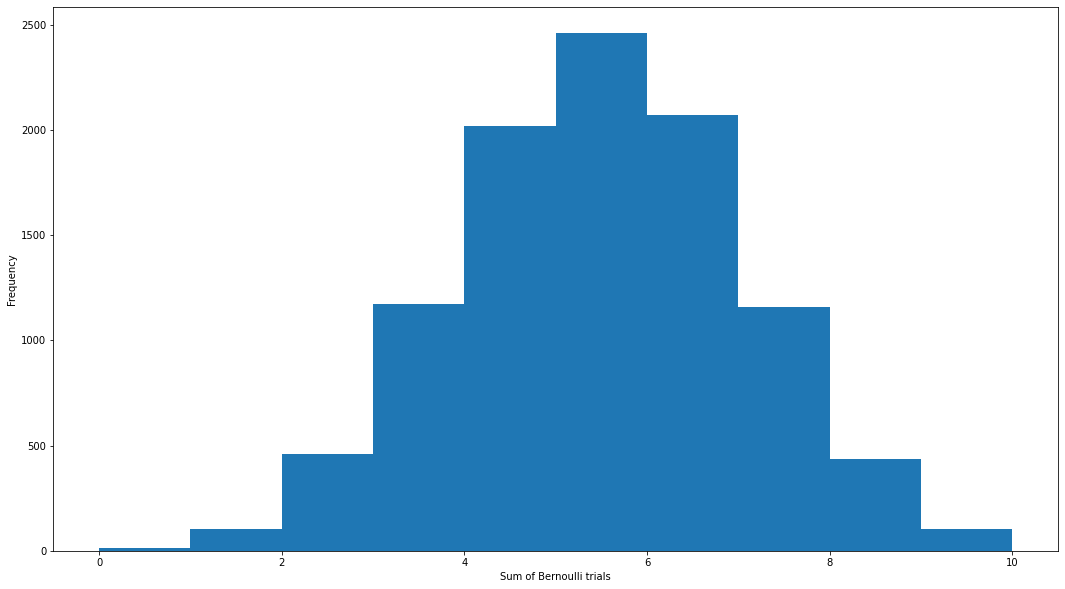

Number of samples above 1.1 * expected is 3771 out of 10000

Chernoff bound says this probability is less than 0.9834714538216175

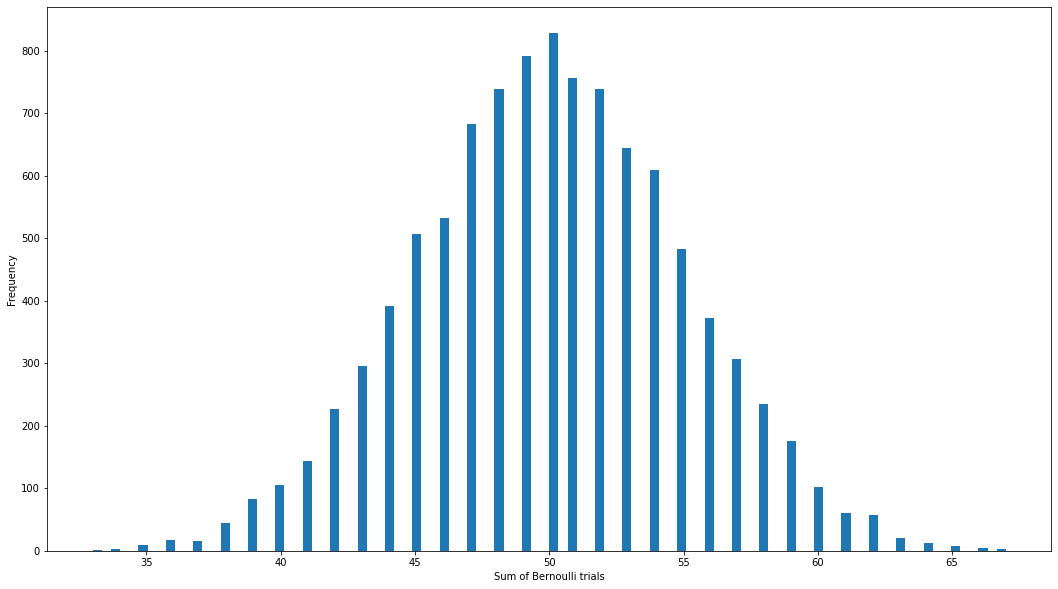

Number of samples above 1.1 * expected is 1356 out of 10000

Chernoff bound says this probability is less than 0.846481724890614

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np
import math
from IPython.display import Markdown, display
%matplotlib inline

######################### Function declarations ########################
# Function that "runs" the experiment
def get_data(trials, samples, prob):
    choices = [0,1] 
    distrib = [1-prob, prob] 
    list = [] # Output
    
    curr = 0
    for i in range(samples):
        for j in range(trials):
            curr += random.choices(choices, weights=distrib)[0] # Add Bernoulli random variables
        list.append(curr) # Remember sample
        curr = 0
        
    return list


# Function to simply show histogram
def plot_histo(data, bins):
    plt.hist(data, bins)
    plt.show()
    
    
# Return the number of values "above" (1 + epsilon) * expected
def get_above_cbound(data, epsilon, expected):
    bound = expected * (1 + epsilon)
    output = 0
    for point in data:
        if point > bound: # Check if random variable is above bound
            output += 1
    return output


# Return the Chernoff bound
def get_chernoff(epsilon, expected):
    if (epsilon > 4): #Use general Chernoff bound
        exponent = -epsilon * np.log(epsilon) * expected / 2
        return math.exp(exponent)
    else:
        exponent = -(epsilon ** 2) * expected / 3
        return math.exp(exponent)
    
    
# Run and report experiment
def chernoff_exp(samples, epsilon, trial, prob, expected, bins):
    data = get_data(trial, samples, prob) 
    plt.figure(figsize=(18, 10))
    plt.xlabel("Sum of Bernoulli trials")
    plt.ylabel("Frequency")
    plot_histo(data, bins)
    above_bound = get_above_cbound(data, epsilon, expected)
    chernoff = get_chernoff(epsilon, expected)

    # Report results
    expStr = str(1 + epsilon) + " * expected is "
    output1 = "Number of samples above " + expStr + str(above_bound) + " out of 10000"
    output2 = "Chernoff bound says this probability is less than " + str(chernoff)
    display(Markdown(output1))
    display(Markdown(output2))

########################### Experiments ##############################
samples = 10000
epsilon = 0.1
chernoff_exp(samples, epsilon, 10, 0.5, 5, 10)
chernoff_exp(samples, epsilon, 100, 0.5, 50, 100)
chernoff_exp(samples, epsilon, 1000, 0.5, 500, 1000)

From seeing the above we can see how sharply the Chernoff bounds shows the probability of the sums deviating from the expected value decreases drastically as n increases.


## Part B
For part B we do the same but change the probability for $\frac{1}{10}$, $\frac{1}{100}$, and $\frac{1}{1000}$ for number of trials 10, 100, and 1000, respectively. Similarly, we set $epsilon$ to be 0.1. It is important to note that the expected value is 1 for all three of these scenario. Note that the Chernoff bound for these cases are
$$P[X \geq (1+\epsilon)] \leq \exp(-\frac{\epsilon\ln(\epsilon)}{2})$$

Note that therefore, since $\epsilon$ is 0.1, this should not show the power of Chernoff bounds as the Chernoff bound calculation will give the upper bound of 0.995.

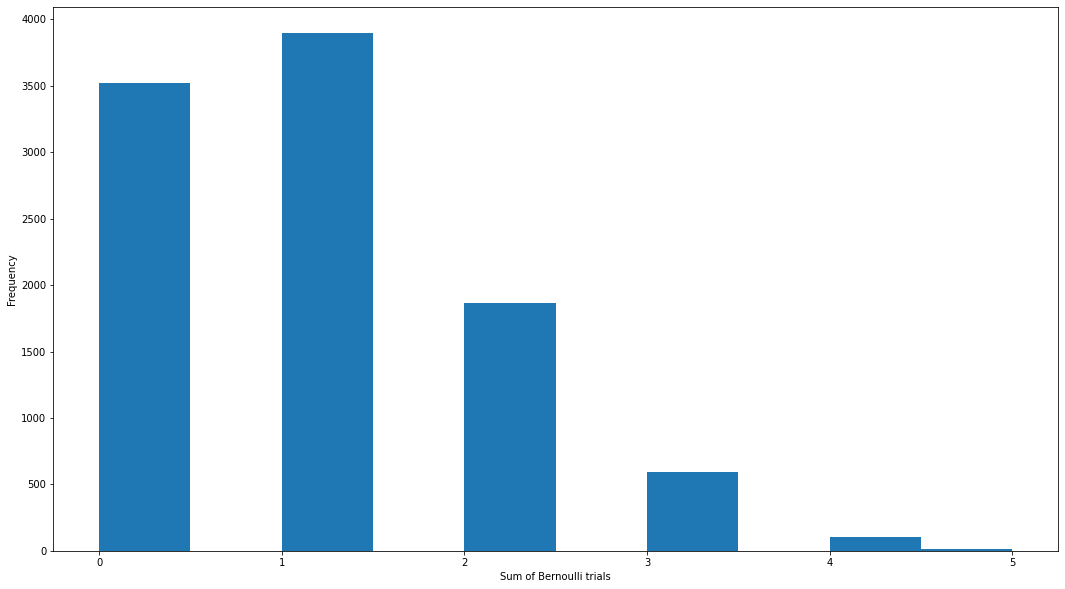

Number of samples above 1.1 * expected is 2583 out of 10000

Chernoff bound says this probability is less than 0.9966722160545233

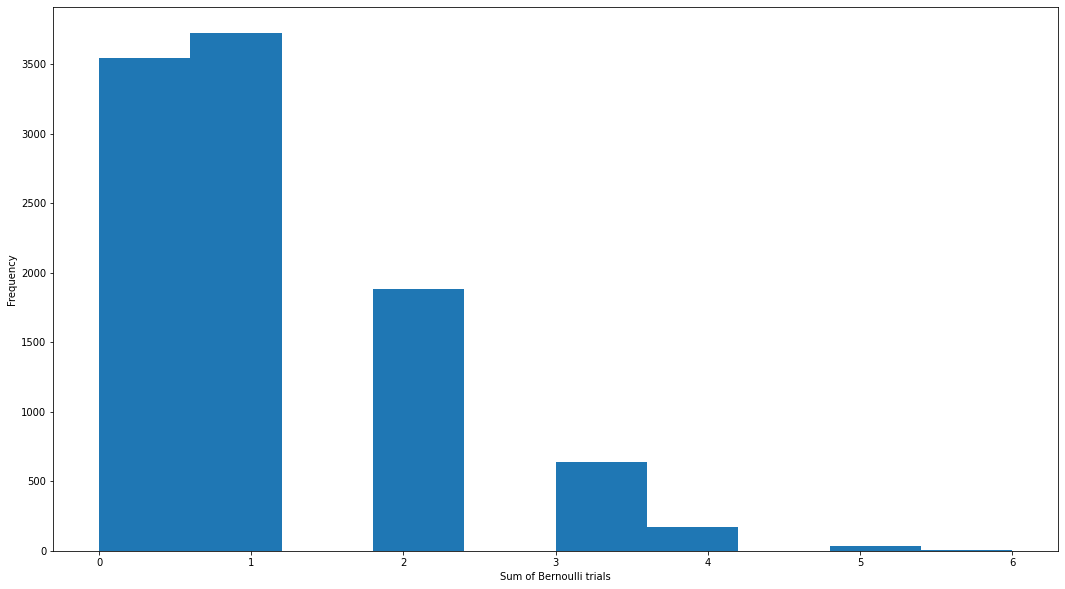

Number of samples above 1.1 * expected is 2730 out of 10000

Chernoff bound says this probability is less than 0.9966722160545233

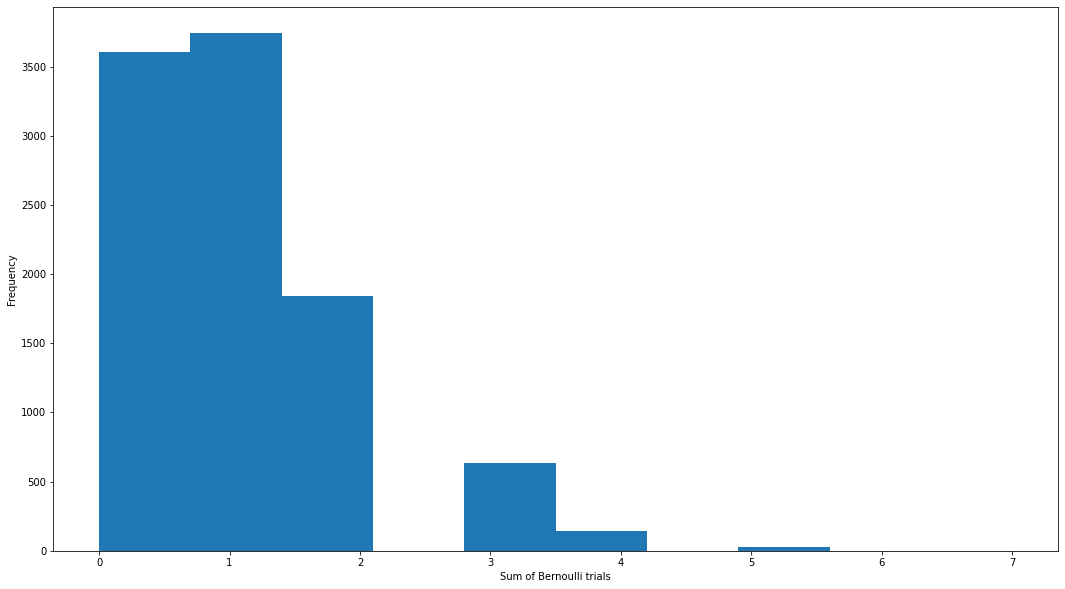

Number of samples above 1.1 * expected is 2653 out of 10000

Chernoff bound says this probability is less than 0.9966722160545233

In [3]:
# Bernoulli trials taking value with probability 1/10, 1/100, 1/1000 with epsilon 0.1
chernoff_exp(samples, epsilon, 10, 1/10, 1, 10)
chernoff_exp(samples, epsilon, 100, 1/100, 1, 10)
chernoff_exp(samples, epsilon, 1000, 1/1000, 1, 10) 

Below shows for when $P[X\geq 10]$. Observe how sharply it become unlikely to get a value far from the expectation. The Chernoff bound here gives an upper bound of \approx 0.00005.

In [ ]:
epsilon = 9
# Bernoulli trials taking value with probability 1/10, 1/100, 1/1000 with epsilon 9
chernoff_exp(samples, epsilon, 10, 1/10, 1, 10)
chernoff_exp(samples, epsilon, 100, 1/100, 1, 10)
chernoff_exp(samples, epsilon, 1000, 1/1000, 1, 10) 